# Interpolation

In [2]:
using Interpolations
include("./ScalarField.jl");

In [147]:
N=3
x=zeros(N);
y=zeros(N);

x=[1.1, 2.8, 4.7]
x1=[1.1, 2.8, 4.8]
y=[1.5, 4.3, 16.1]

data=[x y];


using Interpolations
data[:,1]=x
data[:,2]=y
itp = cubic_spline_interpolation(10:12, 10:12,  extrapolation_bc = Line()) # create interpolation function
itp(9) # call function on input data (use itp.(x) to broadcast over input vector)

8.999999999999998

In [148]:
itp.([9, 8, 1])

3-element Vector{Float64}:
 8.999999999999998
 7.9999999999999964
 0.999999999999984

In [79]:
itp2 = cubic_spline_interpolation(R[4:L-3], state_array[4:L-3,4],  extrapolation_bc = Line())
itp2.(R)

207-element Vector{Float64}:
 -2.2492802065157096e-5
 -1.49952013767714e-5
 -7.4976006883857e-6
 -4.235164736271502e-22
  7.689629700730104e-6
  1.6552824829107725e-5
  2.7892775217897982e-5
  4.327954001763802e-5
  6.470230120446899e-5
  9.474349404271483e-5
  0.00013678076996669706
  0.00019522129280422345
  0.0002757706956599848
  ⋮
 -2.01566457731864e-39
 -5.719520396176462e-40
 -1.6084935678107224e-40
 -4.483299003815029e-41
 -1.238497196306582e-41
 -3.3908734463825724e-42
 -9.201267173992415e-43
 -2.4745912801619788e-43
 -6.595980413957055e-44
  4.924866297391118e-44
  1.644571300873888e-43
  2.7966559720087055e-43

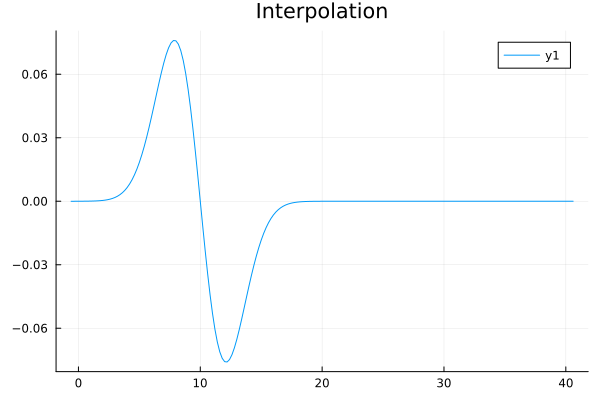

In [80]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, itp2.(R),title="Interpolation")

In [81]:
psi0=0
SFconstraint_psi_new(psi0,R1) = itp2.(R1)

integration = rungekutta4(SFconstraint_psi_new,psi0,R1)

201-element Vector{Float64}:
  0.0
  7.593615194557902e-7
  3.153733052908858e-6
  7.544874151946501e-6
  1.4579476734114407e-5
  2.5257454987628783e-5
  4.103276552659288e-5
  6.395174800239e-5
  9.683503246584859e-5
  0.00014350975614535846
  0.00020909900645941614
  0.0003003748605932674
  0.00042617989754202296
  ⋮
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6
 -7.949465316117314e-6

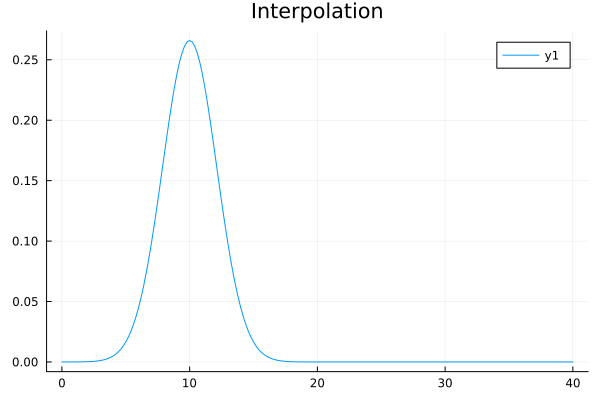

In [82]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R1, integration,title="Interpolation")

# New interpolation

In [78]:
using PyCall   

x = [0, 1, 3, 4, 5]

y = [0, 1, 2, 5, 5]

#sinterpolate = pyimport("interpolate")

scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")

spl = scipyinterpolate.splrep(x,y,k=4)

x2 = [1, 2, 3, 4, 5]
y2 = scipyinterpolate.splev(x2, spl)



5-element Vector{Float64}:
 1.0
 0.4999999999999988
 1.9999999999999982
 4.999999999999998
 5.0

In [237]:
using Latexify
ex = :(z = 2 .* pi .* (1 ./ R1.^3 .- 1 ./ R1.^2) .* (state_array[int.(R1 ./ dx .+ 1),3] .+ (R1 .- 1) .* R1 .* state_array[int.(R1 ./ dx .+ 1),4]) .^2)
latexify(ex)

L"$z = 2 \cdot pi \cdot \left( \frac{1}{R1^{3}} - \frac{1}{R1^{2}} \right) \cdot \left( \mathrm{state}_{array}\left[\mathrm{int}\left( \frac{R1}{dx} + 1 \right), 3\right] + \left( R1 - 1 \right) \cdot R1 \cdot \mathrm{state}_{array}\left[\mathrm{int}\left( \frac{R1}{dx} + 1 \right), 4\right] \right)^{2}$"

Convergence tests on new interpolation

In [30]:
using PyCall   

x = [-1, 2, 4, 6, 8]

y = [-4, 4, 6, 3, -5]

scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")

spl = scipyinterpolate.splrep(x,y,k=4)

x2_1 = [0, 4, 8, 12, 16]
y2_1 = scipyinterpolate.splev(x2_1, spl)

println("res1: ", y2_1)

x2_2 = [0, 2, 4, 6, 8, 10, 12, 14, 16]
y2_2 = scipyinterpolate.splev(x2_2, spl)

println("res2: ", y2_2)

x2_3 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y2_3 = scipyinterpolate.splev(x2_3, spl)

println("res3: ", y2_3)

diff_2_3=0
j=0
k=0
for i in y2_3
    
    if j%2==0
        k=k+1
        println("i = ", i)
        println("y_2_2[k] = ", y2_2[k])
        diff_2_3 += (i-y2_2[k])^2
        
    end
        
    j = j+1
end
println("")
println(diff_2_3)

res1: [-1.22222222222222, 6.0, -5.0, -27.111111111111175, -24.777777777778198]
res2: [-1.22222222222222, 4.0, 6.0, 3.0, -5.0, -16.222222222222236, -27.111111111111175, -32.33333333333352, -24.777777777778198]
res3: [-1.22222222222222, 1.611111111111112, 4.0, 5.555555555555555, 6.0, 5.166666666666666, 3.0, -0.4444444444444433, -5.0, -10.388888888888895, -16.222222222222236, -22.000000000000036, -27.111111111111175, -30.833333333333464, -32.33333333333352, -30.66666666666695, -24.777777777778198]
i = -1.22222222222222
y_2_2[k] = -1.22222222222222
i = 4.0
y_2_2[k] = 4.0
i = 6.0
y_2_2[k] = 6.0
i = 3.0
y_2_2[k] = 3.0
i = -5.0
y_2_2[k] = -5.0
i = -16.222222222222236
y_2_2[k] = -16.222222222222236
i = -27.111111111111175
y_2_2[k] = -27.111111111111175
i = -32.33333333333352
y_2_2[k] = -32.33333333333352
i = -24.777777777778198
y_2_2[k] = -24.777777777778198

0.0


In [31]:
diff_1_2=0
j=0
k=0
for i in y2_2
    
    if j%2==0
        k=k+1
        println("i = ", i)
        println("y_2_1[k] = ", y2_1[k])
        diff_1_2 += (i-y2_1[k])^2
        
    end
        
    j = j+1
end
println("")
println(diff_1_2)

i = -1.22222222222222
y_2_1[k] = -1.22222222222222
i = 6.0
y_2_1[k] = 6.0
i = -5.0
y_2_1[k] = -5.0
i = -27.111111111111175
y_2_1[k] = -27.111111111111175
i = -24.777777777778198
y_2_1[k] = -24.777777777778198

0.0


In [32]:
print(sqrt(diff_1_2/diff_2_3))

NaN

In [16]:
using PyCall   

cst=0


scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")

#x=[1,2,3,4,5,6,7,8]

x1 = [0, 4, 8, 12, 16]
y1 = [0, 16, 64, 144, 256]/100

spl1 = scipyinterpolate.splrep(x1, y1, k=4)
x_res1 = x1

constraint(cst,x)=scipyinterpolate.splev(x, spl1)
yy1 = rungekutta4(constraint,cst,x_res1)

x2 = [0, 2, 4, 6, 8, 10, 12, 14, 16]
y2 = [0, 4, 16, 36, 64, 100, 144, 196, 256]/100

spl2 = scipyinterpolate.splrep(x2, y2, k=4)
x_res2 = x2

constraint(cst,x)=scipyinterpolate.splev(x, spl2)
yy2 = rungekutta4(constraint,cst,x_res2)

x3= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y3 = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256]/100

spl3 = scipyinterpolate.splrep(x3, y3, k=4)
x_res3 = x3

constraint(cst,x) = scipyinterpolate.splev(x, spl3)
yy3 = rungekutta4(constraint,cst,x_res3)

17-element Vector{Float64}:
  0.0
  0.003333333333333327
  0.02666666666666666
  0.08999999999999997
  0.2133333333333333
  0.4166666666666667
  0.72
  1.1433333333333335
  1.706666666666667
  2.4300000000000006
  3.333333333333334
  4.436666666666667
  5.760000000000001
  7.323333333333334
  9.146666666666667
 11.25
 13.653333333333334

In [17]:
println(yy1)
println(yy2)
println(yy3)

[0.0, 0.21333333333333376, 1.7066666666666672, 5.76, 13.653333333333334]
[0.0, 0.02666666666666691, 0.21333333333333337, 0.7200000000000001, 1.7066666666666666, 3.333333333333333, 5.76, 9.146666666666667, 13.653333333333332]
[0.0, 0.003333333333333327, 0.02666666666666666, 0.08999999999999997, 0.2133333333333333, 0.4166666666666667, 0.72, 1.1433333333333335, 1.706666666666667, 2.4300000000000006, 3.333333333333334, 4.436666666666667, 5.760000000000001, 7.323333333333334, 9.146666666666667, 11.25, 13.653333333333334]


In [18]:
(21.333333333333314-21.33333333333333)^2+(170.66666666666666-170.66666666666663)^2+(576.0-576.0)^2+(1365.333333333333-1365.333333333333)^2

1.0097419586828951e-27

In [19]:
(2.6666666666666767-2.6666666666666665)^2+(21.33333333333333-21.333333333333325)^2 +(71.99999999999999-72.0)^2 + (170.66666666666663-170.66666666666669)^2 +(333.3333333333333-333.3333333333333)^2+ (576.0-576.0)^2 +(914.6666666666665-914.6666666666665)^2 +(1365.333333333333-1365.333333333333)^2

3.5500712887208584e-27

In [20]:
diff_1_2=0
j=0
k=0
for i in yy2
    
    if j%2==0
        k=k+1
        println("i = ", i)
        println("yy1[k] = ", yy1[k])
        diff_1_2 += (i-yy1[k])^2
        
    end
        
    j = j+1
end
println(" ")
println(diff_1_2)

i = 0.0
yy1[k] = 0.0
i = 0.21333333333333337
yy1[k] = 0.21333333333333376
i = 1.7066666666666666
yy1[k] = 1.7066666666666672
i = 5.76
yy1[k] = 5.76
i = 13.653333333333332
yy1[k] = 13.653333333333334
 
3.750170787710826e-30


In [21]:
diff_2_3=0
j=0
k=0
for i in yy3
    
    if j%2==0
        k=k+1
        println("i = ", i)
        println("yy2[k] = ", yy2[k])
        diff_2_3 += (i-yy2[k])^2
        
    end
        
    j = j+1
end
println("")
println(diff_2_3)

i = 0.0
yy2[k] = 0.0
i = 0.02666666666666666
yy2[k] = 0.02666666666666691
i = 0.2133333333333333
yy2[k] = 0.21333333333333337
i = 0.72
yy2[k] = 0.7200000000000001
i = 1.706666666666667
yy2[k] = 1.7066666666666666
i = 3.333333333333334
yy2[k] = 3.333333333333333
i = 5.760000000000001
yy2[k] = 5.76
i = 9.146666666666667
yy2[k] = 9.146666666666667
i = 13.653333333333334
yy2[k] = 13.653333333333332

5.0120400872733426e-30


In [22]:
print(sqrt(diff_1_2/diff_2_3))

0.8650042779436088

now with f(x)=sin(x)

In [48]:
using PyCall   

cst=0


scipy = pyimport("scipy")
scipyinterpolate = pyimport("scipy.interpolate")

#x=[1,2,3,4,5,6,7,8]

x1 = range(0, stop=1, step=0.1);
y1 = sin.(x1)/5

spl1 = scipyinterpolate.splrep(x1, y1, k=4)
x_res1 = x1

constraint(cst,x)=scipyinterpolate.splev(x, spl1)
yy1 = rungekutta4(constraint,cst,x_res1)

x2 = range(0, stop=1, step=0.05);
y2 = sin.(x2)/5

spl2 = scipyinterpolate.splrep(x2, y2, k=4)
x_res2 = x2

constraint(cst,x)=scipyinterpolate.splev(x, spl2)
yy2 = rungekutta4(constraint,cst,x_res2)

x3 = range(0, stop=1, step=0.025);
y3 = sin.(x3)/5

spl3 = scipyinterpolate.splrep(x3, y3, k=4)
x_res3 = x3

constraint(cst,x) = scipyinterpolate.splev(x, spl3)
yy3 = rungekutta4(constraint,cst,x_res3)

41-element Vector{Float64}:
 0.0
 6.249674432564504e-5
 0.00024994792067415035
 0.0005622363772049962
 0.0009991669441234254
 0.0015604665539306131
 0.002245784412683868
 0.003054692219014227
 0.003986684431879347
 0.005041178586481848
 0.00621751565830109
 0.00751496047495835
 0.008932702175676965
 ⋮
 0.050300115613173865
 0.05366222623209856
 0.05711579319614468
 0.0606586581383783
 0.06428860688353534
 0.06800337083181116
 0.0718006283766557
 0.07567800635571825
 0.07963308153395181
 0.08366338211818022
 0.08776638930154444
 0.09193953883866027

In [50]:
diff_1_2=0
j=0
k=0
for i in yy2
    
    if j%2==0
        k=k+1
        diff_1_2 += (i-yy1[k])^2
        
    end
        
    j = j+1
end

#println(diff_1_2)
diff_2_3=0
j=0
k=0
for i in yy3
    
    if j%2==0
        k=k+1
        diff_2_3 += (i-yy2[k])^2
        
    end
        
    j = j+1
end

#println(diff_2_3)

println(sqrt(diff_1_2/diff_2_3))

12.36906718463126
